In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
FoodFacts = pd.read_csv("FoodFacts.csv")
print(FoodFacts.head())
print(FoodFacts.info())

                 code                                                url  \
0  000000000000012866  http://world-en.openfoodfacts.org/product/0000...   
1       0000000024600  http://world-en.openfoodfacts.org/product/0000...   
2       0000000036252  http://world-en.openfoodfacts.org/product/0000...   
3       0000000039259  http://world-en.openfoodfacts.org/product/0000...   
4       0000000039529  http://world-en.openfoodfacts.org/product/0000...   

           creator   created_t      created_datetime last_modified_t  \
0  date-limite-app  1447004364  2015-11-08T17:39:24Z      1447004364   
1  date-limite-app  1434530704  2015-06-17T08:45:04Z      1434535914   
2          tacinte  1422221701  2015-01-25T21:35:01Z      1422221855   
3          tacinte  1422221773  2015-01-25T21:36:13Z      1422221926   
4         teolemon  1420147051  2015-01-01T21:17:31Z      1439141740   

  last_modified_datetime            product_name generic_name quantity  \
0   2015-11-08T17:39:24Z  Poêlée à l

/Users/zhaoxiaoxing/anaconda/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Find sugar consumption ranklist

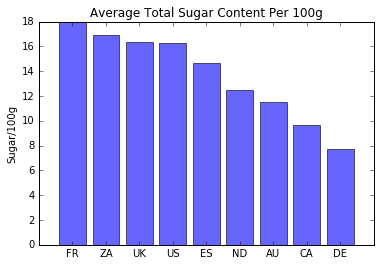

In [21]:
# Convert the countries name to lowercase
FoodFacts.countries=FoodFacts.countries.str.lower()
# Clacute the mean value
def mean(num):
    return float(sum(num)) / len(num)

# Filter not null value 
world_sugars = FoodFacts[FoodFacts.sugars_100g.notnull()]

def get_sugars(country):
    return world_sugars[world_sugars.countries == country].sugars_100g.tolist()

# Get list of sugars per 100g for some countries
fr_sugars = get_sugars('france') + get_sugars('en:fr')
za_sugars = get_sugars('south africa')
uk_sugars = get_sugars('united kingdom') + get_sugars('en:gb')
us_sugars = get_sugars('united states') + get_sugars('en:us') + get_sugars('us')
sp_sugars = get_sugars('spain') + get_sugars('españa') + get_sugars('en:es')
nd_sugars = get_sugars('netherlands') + get_sugars('holland')
au_sugars = get_sugars('australia') + get_sugars('en:au')
ca_sugars = get_sugars('canada') + get_sugars('en:cn')
de_sugars = get_sugars('germany')

countries = ['FR','ZA','UK','US','ES','ND','AU','CA','DE']
sugars_mean_list = [mean(fr_sugars),
                    mean(za_sugars),
                    mean(uk_sugars),
                    mean(us_sugars),
                    mean(sp_sugars),
                    mean(nd_sugars),
                    mean(au_sugars),
                    mean(ca_sugars),
                    mean(de_sugars)]

sugars_mean_list = sorted(sugars_mean_list,reverse=True)
y_axis = np.arange(len(countries))

plt.bar(y_axis, sugars_mean_list, align='center', alpha=.6)
plt.title('Average Total Sugar Content Per 100g')
plt.xticks(y_axis, countries)
plt.ylabel('Sugar/100g')

plt.show()

# Find Caffine consumption